<a href="https://colab.research.google.com/github/UlasSen/NLP/blob/main/RNN_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [8]:

df['targets'] = df['labels'].astype("category").cat.codes
# number of classes
K = df['targets'].max() + 1
K

5

In [9]:
df_train, df_test = train_test_split(df, test_size=0.3)


In [10]:
# Convert sentences to sequences
MAX_VOCAB_SIZE = 2000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train['text'])
sequences_train = tokenizer.texts_to_sequences(df_train['text'])
sequences_test = tokenizer.texts_to_sequences(df_test['text'])


In [11]:
# get word -> integer mapping
word2idx = tokenizer.word_index
V = len(word2idx)
print('Found %s unique tokens.' % V)

Found 27850 unique tokens.


In [12]:
# pad sequences so that we get a N x T matrix
data_train = pad_sequences(sequences_train)
print('Shape of data train tensor:', data_train.shape)

# get sequence length
T = data_train.shape[1]

Shape of data train tensor: (1557, 3491)


In [13]:
data_test = pad_sequences(sequences_test, maxlen=T)
print('Shape of data test tensor:', data_test.shape)

Shape of data test tensor: (668, 3491)


In [14]:
# Create the model

# We get to choose embedding dimensionality
D = 20

# Note: we actually want to the size of the embedding to (V + 1) x D,
# because the first index starts from 1 and not 0.
# Thus, if the final index of the embedding matrix is V,
# then it actually must have size V + 1.

i = Input(shape=(T,))
x = Embedding(V + 1, D)(i)
x = LSTM(32, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(K)(x)

model = Model(i, x)

In [15]:
model.compile(
  loss=SparseCategoricalCrossentropy(from_logits=True),
  optimizer='adam',
  metrics=['accuracy']
)


print('Training model...')
r = model.fit(
  data_train,
  df_train['targets'],
  epochs=50,
  validation_data=(data_test, df_test['targets'])
)

Training model...
Epoch 1/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 113ms/step - accuracy: 0.2189 - loss: 1.6069 - val_accuracy: 0.4760 - val_loss: 1.5817
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.4191 - loss: 1.5377 - val_accuracy: 0.2874 - val_loss: 1.5225
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 119ms/step - accuracy: 0.3966 - loss: 1.3575 - val_accuracy: 0.5015 - val_loss: 1.1824
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 11s 125ms/step - accuracy: 0.4391 - loss: 1.2063 - val_accuracy: 0.6183 - val_loss: 1.3431
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 117ms/step - accuracy: 0.6796 - loss: 1.2347 - val_accuracy: 0.6617 - val_loss: 1.2031
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - accuracy: 0.7180 - loss: 1.0183 - val_accuracy: 0.8458 - val_loss: 0.8334
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 120ms/step - accuracy: 0.8393 - loss: 0.7662 - val_accuracy: 0.8593 - val_loss: 0.6609
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 105ms/step - accuracy: 0.8798 - loss: 0.

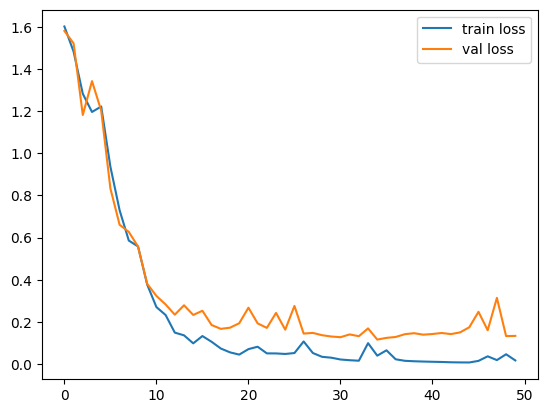

In [16]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend();

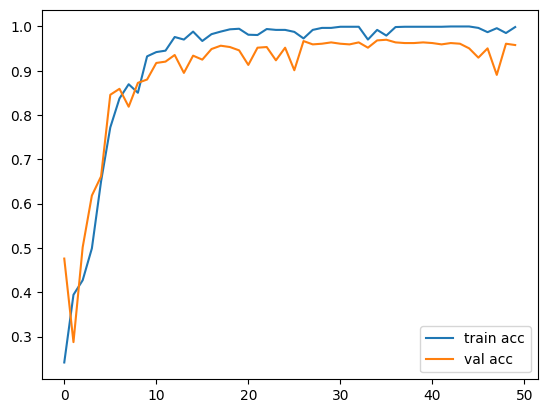

In [17]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend();